Hello people. In this lecture we will examine Titanic problem. I assume you already finished some other lecture and mostly learned theorical aspect of data science. It is good opportunity to make practice. You can find information at everywhere. It is most simple thing. Courses are full of information. Here, we will give you the chance to practice and improve your skills. Assume here as a sandbag, a punching bag. Before go to a fight you need study with sandbag. But purpose is not knock down the sandbag, right?   


But keep in mind. Our purpose is not predicting. We will predict. But it is not our main target. I know you are exited to do that. But believe me, main important skill is learning to how to examine one problem. Assume it as a rubic cube. We will learn how to move it different sides and in the light of sun we will learn to look into it from different angles. This kind of skills will bring you the success. 

I think you understood what is my purpose to teach. It is good. Also there is another purpose too. We need to always improve our cv or github account. But when students watch a course and practice the codes they postphone to upload them to github. They think that they can do it later or they improve their code file and upload it later. Dont do it. Dont postphone to write same codes with me and upload them to your github account please. Accept that your coding file is not perfect. Accept the defect. Please write the codes with me and upload them to your github without postphoning.  

In this problem we will predict who will die, who will survive? 

If you are ready let we begin!



Dosyaların linkini - kaggle kısaca anlat  https://www.kaggle.com/c/titanic/overview

Firstly we need to download problem data files. Our web source is kaggle.com. I ll put the link to the end of video. When we solve the problem you can also send your result and get a score from competition. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

!First task is writing our imports. We use pandas, numpy, matplotlib, seaborn, confusion matrix and preproccessing. 

### Veri Yükleme

In [2]:
df_train   = pd.read_csv("train.csv")
df_test    = pd.read_csv("test.csv")
gender_sub = pd.read_csv("gender_submission.csv")

### Veri Keşfi

In [3]:
df = pd.concat([df_train,df_test],axis=0)
# here we need to concat df_train and df_test. we will make data cleaning on one data frame and then split it again in the end.

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
df
#lets examine our united df variable. 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [5]:
df[0:891]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369


In [6]:
df[892:]
#PART-5 burada bitiyor.

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
5,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [7]:
#we need to also look into gender_sub variable. it is the example format for kaggle. we will make our predictions 
#in this format and upload into kaggle and take a score in leaderboard. 
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### PassengerId

In [9]:
print("df_train['PassengerId'] unique row number : " , len(df_train["PassengerId"].unique()))
print("df_test['PassengerId']  unique row number : " , len(df_test["PassengerId"].unique()))

df_train['PassengerId'] unique row number :  891
df_test['PassengerId']  unique row number :  418


### Survived

In [10]:
survived_unique, survived_counts = np.unique(df_train["Survived"], return_counts=True)
sur_dict = dict(zip(survived_unique, survived_counts))
sur_dict

{0: 549, 1: 342}

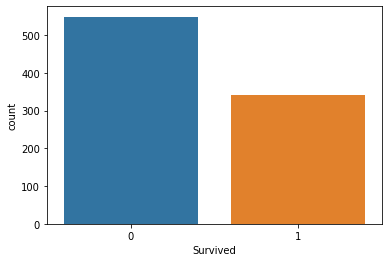

In [11]:
g = sns.countplot(x="Survived",data=df_train)


## Age

In [12]:
##Filling Missing Values

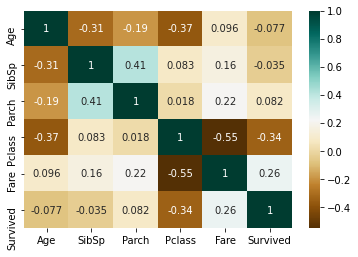

In [15]:
g = sns.heatmap(df_train[["Age","SibSp","Parch","Pclass","Fare","Survived"]].corr(),cmap="BrBG",annot=True)

In [15]:
index_nan_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_nan_age :
    age_med    = df["Age"].median() 
    age_predict = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(age_predict) :
        df['Age'].iloc[i] = age_predict
    else :
        df['Age'].iloc[i] = age_med

D:\ProgramFiles\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


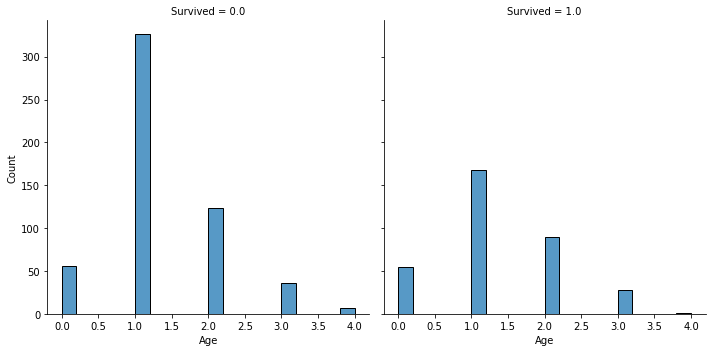

In [44]:
sns.displot(
    df, x="Age", col="Survived"
)

In [18]:
df.loc[ df['Age'] <= 16, 'Age']= 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age']= 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age']= 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age']= 3
df.loc[ df['Age'] > 64, 'Age']= 4

### Pclass

In [38]:
df.Pclass = df.Pclass.astype("category")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

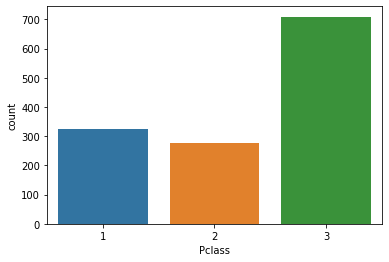

In [17]:
g = sns.countplot(x="Pclass",data=df)

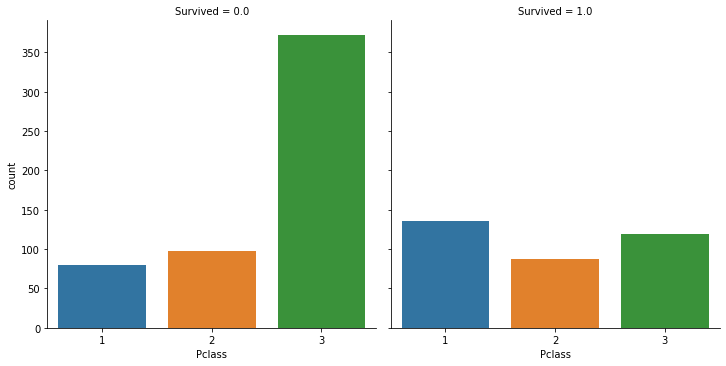

In [43]:
sns.catplot(
    x="Pclass", col="Survived", data=df, kind="count"
)

### Name

In [14]:
# 2. kelime tagları olduğu için işimize yarayabilir.

In [22]:
df["Title"] = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]


In [29]:
df.Title = df.Title.astype("category")

<AxesSubplot:xlabel='count', ylabel='Title'>

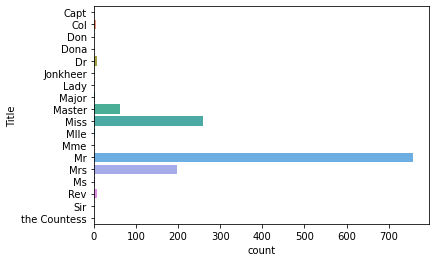

In [33]:
sns.countplot(y="Title",data=df )

In [38]:
df['Title'] = df['Title'].replace(['Lady','the Countess' ,'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

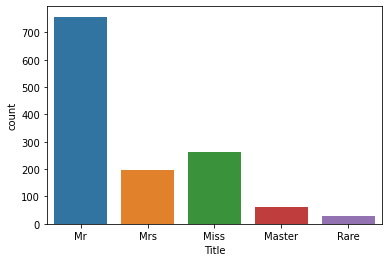

In [39]:
sns.countplot(x="Title",data=df)

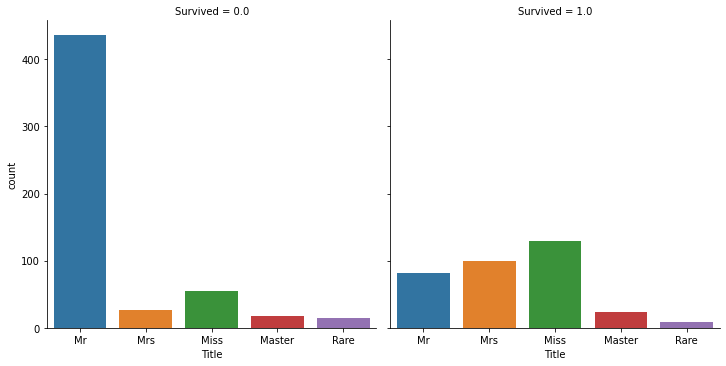

In [40]:
sns.catplot(
    x="Title", col="Survived", data=df, kind="count"
)

### Title Label Encoder 

In [105]:
le_train = preprocessing.LabelEncoder()
df_train['Title'] = le_train.fit_transform(df_train['Title'])


le_test = preprocessing.LabelEncoder()
df_test['Title'] = le_test.fit_transform(df_test['Title'])

### Sex

In [106]:
df_train['Sex'] = df_train['Sex'].replace('male',1)
df_train['Sex'] = df_train['Sex'].replace('female',0)

df_test['Sex'] = df_test['Sex'].replace('male',1)
df_test['Sex'] = df_test['Sex'].replace('female',0)


In [107]:
df_train["Sex"] = df_train["Sex"].astype('int')

Text(0.5, 0.98, 'Train Data')

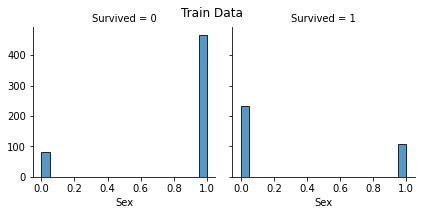

In [108]:
g2 = sns.FacetGrid(df_train, col='Survived')
g2.map(sns.histplot,  'Sex', bins=20)
g2.fig.suptitle('Train Data')

### SibSp

In [117]:
SibSp_unique_train, SibSp_counts_train = np.unique(df_train["SibSp"], return_counts=True)
SibSp_dict_train = dict(zip(SibSp_unique_train, SibSp_counts_train))
SibSp_dict_train

{0: 608, 1: 209, 2: 28, 3: 16, 4: 18, 5: 5, 8: 7}

Text(0.5, 0.98, 'Train Data')

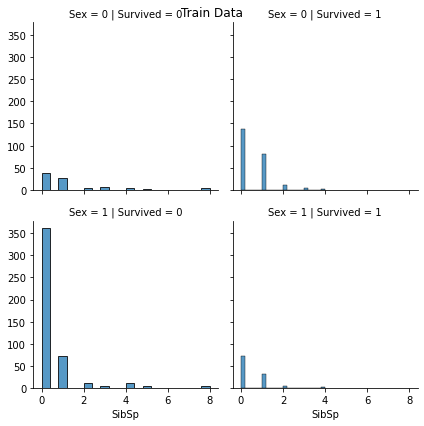

In [118]:
# bekar erkekler ölmüş mü incele bakalım..

#df_train["SibSp"] = df_train["SibSp"].astype('category')
#df_test["SibSp"] = df_test["SibSp"].astype('category')

g3 = sns.FacetGrid(df_train , row = "Sex", col='Survived')
g3.map(sns.histplot,  'SibSp', bins=20)
g3.fig.suptitle('Train Data')

### Parch

In [119]:
Parch_unique_train, Parch_counts_train = np.unique(df_train["Parch"], return_counts=True)
Parch_dict_train = dict(zip(Parch_unique_train, Parch_counts_train))
Parch_dict_train

{0: 678, 1: 118, 2: 80, 3: 5, 4: 4, 5: 5, 6: 1}

Text(0.5, 0.98, 'Train Data')

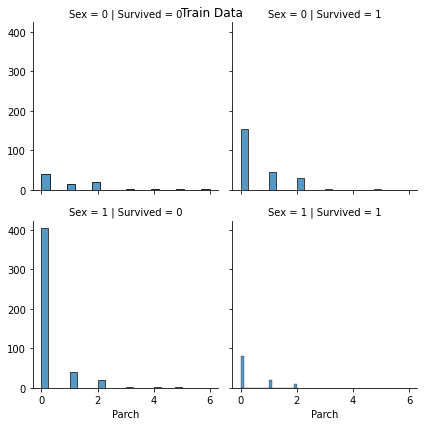

In [120]:
g3 = sns.FacetGrid(df_train , row = "Sex", col='Survived')
g3.map(sns.histplot,  'Parch', bins=20)
g3.fig.suptitle('Train Data')

### Ticket

In [121]:
Ticket_unique_train, Ticket_counts_train = np.unique(df_train["Ticket"], return_counts=True)
Ticket_dict_train = dict(zip(Ticket_unique_train, Ticket_counts_train))
Ticket_dict_train

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110564': 1,
 '110813': 1,
 '111240': 1,
 '111320': 1,
 '111361': 2,
 '111369': 1,
 '111426': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112052': 1,
 '112053': 1,
 '112058': 1,
 '112059': 1,
 '112277': 1,
 '112379': 1,
 '113028': 1,
 '113043': 1,
 '113050': 1,
 '113051': 1,
 '113055': 1,
 '113056': 1,
 '113059': 1,
 '113501': 1,
 '113503': 1,
 '113505': 2,
 '113509': 1,
 '113510': 1,
 '113514': 1,
 '113572': 2,
 '113760': 4,
 '113767': 1,
 '113773': 1,
 '113776': 2,
 '113781': 4,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113792': 1,
 '113794': 1,
 '113796': 1,
 '113798': 2,
 '113800': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752': 1,
 '11753': 1,
 '11755': 1,
 '11765': 1,
 '11767': 2,
 '11769': 1,
 '11771': 1,
 '11774': 1,
 '11813': 1,
 '11967': 2,
 '12233': 1,
 '12460': 1,
 '12749': 2,
 '13049': 1,
 '13213': 1,
 '13214': 1,
 '13502': 3,
 '13507': 2

### Fare

In [122]:
Fare_unique_train, Fare_counts_train = np.unique(df_train["Fare"], return_counts=True)
Fare_dict_train = dict(zip(Fare_unique_train, Fare_counts_train))
Fare_dict_train

{0.0: 15,
 4.0125: 1,
 5.0: 1,
 6.2375: 1,
 6.4375: 1,
 6.45: 1,
 6.4958: 2,
 6.75: 2,
 6.8583: 1,
 6.95: 1,
 6.975: 2,
 7.0458: 1,
 7.05: 7,
 7.0542: 2,
 7.125: 4,
 7.1417: 1,
 7.225: 12,
 7.2292: 15,
 7.25: 13,
 7.3125: 1,
 7.4958: 3,
 7.5208: 1,
 7.55: 4,
 7.6292: 1,
 7.65: 4,
 7.725: 1,
 7.7292: 1,
 7.7333: 4,
 7.7375: 2,
 7.7417: 1,
 7.75: 34,
 7.775: 16,
 7.7875: 1,
 7.7958: 6,
 7.8: 1,
 7.8292: 2,
 7.8542: 13,
 7.875: 1,
 7.8792: 4,
 7.8875: 1,
 7.8958: 38,
 7.925: 18,
 8.0292: 1,
 8.05: 43,
 8.1125: 1,
 8.1375: 1,
 8.1583: 1,
 8.3: 1,
 8.3625: 1,
 8.4042: 1,
 8.4333: 1,
 8.4583: 1,
 8.5167: 1,
 8.6542: 1,
 8.6625: 13,
 8.6833: 1,
 8.7125: 1,
 8.85: 1,
 9.0: 2,
 9.2167: 1,
 9.225: 2,
 9.35: 2,
 9.475: 1,
 9.4833: 1,
 9.5: 9,
 9.5875: 2,
 9.825: 2,
 9.8375: 1,
 9.8417: 1,
 9.8458: 1,
 10.1708: 1,
 10.4625: 2,
 10.5: 24,
 10.5167: 1,
 11.1333: 3,
 11.2417: 2,
 11.5: 4,
 12.0: 1,
 12.275: 1,
 12.2875: 1,
 12.35: 3,
 12.475: 4,
 12.525: 1,
 12.65: 1,
 12.875: 1,
 13.0: 42,
 13.4167:

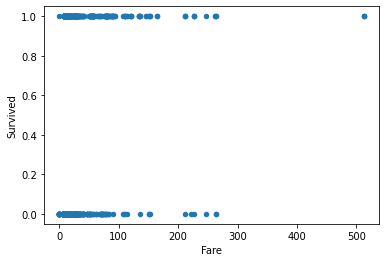

In [123]:
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
df_train.plot.scatter(x="Fare", y='Survived');

### Cabin

In [124]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [125]:
df_train.loc[df_train.Cabin.str[0]=="A", "Cabin"] = 1
df_train.loc[df_train.Cabin.str[0]=="B", "Cabin"] = 2
df_train.loc[df_train.Cabin.str[0]=="C", "Cabin"] = 3
df_train.loc[df_train.Cabin.str[0]=="D", "Cabin"] = 4
df_train.loc[df_train.Cabin.str[0]=="E", "Cabin"] = 5
df_train.loc[df_train.Cabin.str[0]=="F", "Cabin"] = 6
df_train.loc[df_train.Cabin.str[0]=="G", "Cabin"] = 7
df_train.loc[df_train.Cabin.str[0]=="T", "Cabin"] = 8

In [126]:
df_test.loc[df_test.Cabin.str[0]=="A", "Cabin"] = 1
df_test.loc[df_test.Cabin.str[0]=="B", "Cabin"] = 2
df_test.loc[df_test.Cabin.str[0]=="C", "Cabin"] = 3
df_test.loc[df_test.Cabin.str[0]=="D", "Cabin"] = 4
df_test.loc[df_test.Cabin.str[0]=="E", "Cabin"] = 5
df_test.loc[df_test.Cabin.str[0]=="F", "Cabin"] = 6
df_test.loc[df_test.Cabin.str[0]=="G", "Cabin"] = 7
df_test.loc[df_test.Cabin.str[0]=="T", "Cabin"] = 8

AttributeError: Can only use .str accessor with string values!

In [127]:
df_train.Cabin= df_train.Cabin.fillna(0)
df_test.Cabin = df_test.Cabin.fillna(0)

In [128]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,3,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,3,S,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,0,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,0,0,211536,13.0000,0,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,0,0,112053,30.0000,2,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,1,2,W./C. 6607,23.4500,0,S,1
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,0,0,111369,30.0000,3,C,2


<AxesSubplot:>

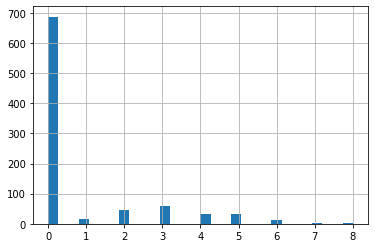

In [129]:
df_train['Cabin'].hist(bins = 30)

### Embarked

In [130]:
Embarked_unique_train, Embarked_counts_train = np.unique(df_train["Embarked"], return_counts=True)
Embarked_dict_train = dict(zip(Embarked_unique_train, Embarked_counts_train))
Embarked_dict_train

TypeError: '<' not supported between instances of 'float' and 'str'

In [131]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [133]:
df_train.Embarked=df_train.Embarked.fillna(0)
df_train.loc[df_train.Embarked.str[0]=="S", "Embarked"] = 1
df_train.loc[df_train.Embarked.str[0]=="Q", "Embarked"] = 2
df_train.loc[df_train.Embarked.str[0]=="C", "Embarked"] = 3


In [136]:
df_test.Embarked=df_test.Embarked.fillna(0)
df_test.loc[df_test.Embarked.str[0]=="S", "Embarked"] = 1
df_test.loc[df_test.Embarked.str[0]=="Q", "Embarked"] = 2
df_test.loc[df_test.Embarked.str[0]=="C", "Embarked"] = 3


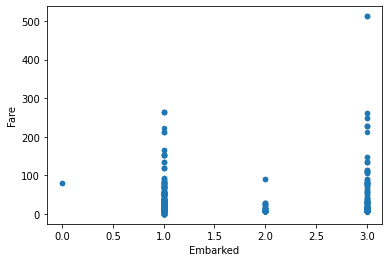

In [134]:
#grafik = pd.concat([df_train['SalePrice'], df_train["Embarked"]], axis=1)
df_train.plot.scatter(x="Embarked", y='Fare');

In [135]:
df_train[df_train.Embarked == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",0,2.0,0,0,113572,80.0,2,0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,3.0,0,0,113572,80.0,2,0,3


In [137]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,3,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,3,1,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,0,0,211536,13.0000,0,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,0,0,112053,30.0000,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,1,2,W./C. 6607,23.4500,0,1,1
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,0,0,111369,30.0000,3,3,2


In [138]:
y = df_train.Survived

In [139]:

df_train.drop(["PassengerId", "Survived", "Name", "Ticket"],axis=1,inplace=True)


In [142]:
df_test.drop(["PassengerId", "Name", "Ticket"],axis=1,inplace=True)

In [140]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,1,1.0,1,0,7.2500,0,1,2
1,1,0,2.0,1,0,71.2833,3,3,3
2,3,0,1.0,0,0,7.9250,0,1,1
3,1,0,2.0,1,0,53.1000,3,1,3
4,3,1,2.0,0,0,8.0500,0,1,2
...,...,...,...,...,...,...,...,...,...
886,2,1,1.0,0,0,13.0000,0,1,4
887,1,0,1.0,0,0,30.0000,2,1,1
888,3,0,1.0,1,2,23.4500,0,1,1
889,1,1,1.0,0,0,30.0000,3,3,2


In [143]:
from sklearn.model_selection  import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(df_train ,y , test_size = 0.33 , random_state = 0)

In [146]:
from sklearn.ensemble import RandomForestClassifier

R_F = RandomForestClassifier()
R_F.fit(x_train, y_train)

y_pred = R_F.predict(x_test)

print("Random Forest R2")
print(confusion_matrix(y_test, y_pred))

Random Forest R2
[[166  18]
 [ 29  82]]


In [ ]:
## %84